In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

data = pd.read_csv("student-mat.csv")

data.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [11]:
data.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

<AxesSubplot:>

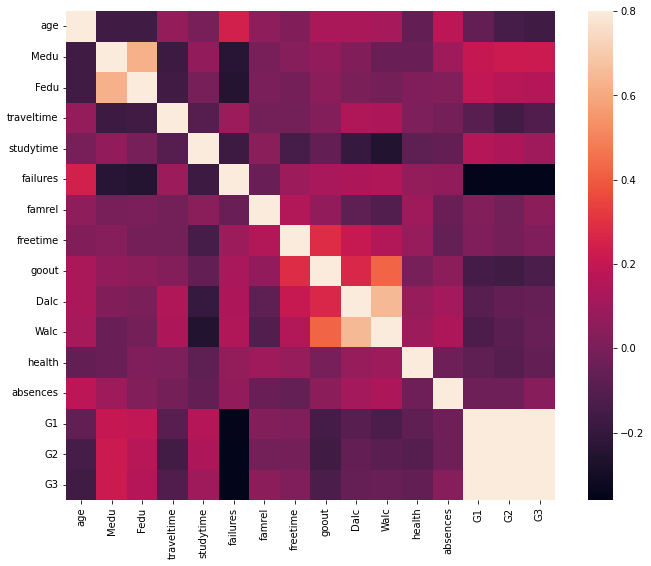

In [12]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [13]:
new_data = 	data.loc[:, ["Dalc", "Walc", "goout", "freetime", "G3"]]

In [14]:
new_data.head(15)

,Dalc,Walc,goout,freetime,G3
0,1,1,4,3,6
1,1,1,3,3,6
2,2,3,2,3,10
3,1,1,2,2,15
4,1,2,2,3,10
5,1,2,2,4,15
6,1,1,4,4,11
7,1,1,4,1,6
8,1,1,2,2,19
9,1,1,1,5,15


In [15]:
new_data.isnull().sum()

Dalc        0
Walc        0
goout       0
freetime    0
G3          0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

# Selected_features = ['Dalc','Walc','goout','freetime']

X = new_data.drop("G3",axis=1)
y = new_data.G3.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.22      0.10      0.13        21
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        12
          10       0.18      0.67      0.28        18
          11       0.08      0.29      0.13        17
          12       0.14      0.08      0.11        12
          13       0.20      0.17      0.18        12
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00         6
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         6
          19       0.00      0.00      0.00         3

    accuracy              

/Users/ayselpolat/Documents/ML-For-Beginners/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ayselpolat/Documents/ML-For-Beginners/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ayselpolat/Documents/ML-For-Beginners/venv/lib/python3.10/site-packages/sklearn/metrics/_cla